## **PMI plot**

A ternary plot of and Principal Moments of Inertia (PMI) was used to analyze molecular geometry. A low energy conformation was calculated using the MMFF94x force field implemented in Molecular Operating Environment, and the three principal moments of inertia, I1, I2 and I3 were determined. Their respective normalized PMI ratios, npr1 = I1/I3 and npr2 = I2/I3, 

In [ ]:
!pip install python-ternary
!pip install scikit-image

In [22]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
# Import libraries for chemical informatics
from rdkit import Chem
# Import libraries for image processing
from PIL import Image
# Import visualization libraries
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.offsetbox as offsetbox  # If specific functions from offsetbox are needed, consider specific imports

In [23]:
df = pd.read_csv('PMI_STADS.csv')
bia = pd.read_csv('PMI_DIADS.csv')
ind = pd.read_csv('PMI_INDDS.csv')
pyr = pd.read_csv('PMI_PYRDS.csv')

In [24]:
print(len(df))
print(len(bia))
print(len(ind))
print(len(pyr))

217
36107
85603
62797


In [25]:
print(df.head(1))
print(bia.head(1))
print(ind.head(1))
print(pyr.head(1))

      pIC50      npr1      npr2  \
0  5.173925  0.312183  0.758777   

                                           SMILES  
0  CC(=O)N(C)Cc1cc(C(=O)N(C)Cc2cc3ccccc3n2C)ccc1N  
                                       outmol      npr1      npr2  \
0  Fc1c(CC)c2sc(O)c(Oc3c(F)cc(C(=O)N)cc3)c2s1  0.155285  0.941905   

                                       smiles  
0  Fc1c(CC)c2sc(O)c(Oc3c(F)cc(C(=O)N)cc3)c2s1  
                                              outmol      npr1      npr2  \
0  Oc1ccc(/C=C/2\Cc3n(Cc4ccc(O)cc4)c4c(c3CC\2)ccc...  0.382254  0.756446   

                                              smiles  
0  Oc1ccc(/C=C/2\Cc3n(Cc4ccc(O)cc4)c4c(c3CC\2)ccc...  
                                              outmol      npr1      npr2  \
0  O(CC=1N(C)C=C(Oc2c(C)c3[nH]c(C)cc3[nH]2)C(=O)C...  0.086432  0.961784   

                                              smiles  
0  O(CC=1N(C)C=C(Oc2c(C)c3[nH]c(C)cc3[nH]2)C(=O)C...  


In [26]:
print(df.columns)
print(bia.columns)
print(ind.columns)
print(pyr.columns)

Index(['pIC50', 'npr1', 'npr2', 'SMILES'], dtype='object')
Index(['outmol', 'npr1', 'npr2', 'smiles'], dtype='object')
Index(['outmol', 'npr1', 'npr2', 'smiles'], dtype='object')
Index(['outmol', 'npr1', 'npr2', 'smiles'], dtype='object')


In [28]:
def ensure_white_background(image_path):
    # Open the image and ensure it has an RGBA mode (which includes alpha)
    img = Image.open(image_path).convert("RGBA")
    
    # Create a blank image with a white background
    white_bg = Image.new("RGBA", img.size, (255, 255, 255, 255))
    
    # Alpha composite the original PNG onto the white background
    white_bg.alpha_composite(img)
    
    # Convert back to RGB if you don’t need the alpha channel anymore
    return white_bg.convert("RGB")

# Usage example in your add_png_image function
def add_png_image(ax, image_path, coords, zoom=1.0, zorder=10):
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    
    # Use the helper function above to ensure the background is white
    img = ensure_white_background(image_path)

    im = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(im, coords, frameon=False, xycoords='data', zorder=zorder)
    ax.add_artist(ab)


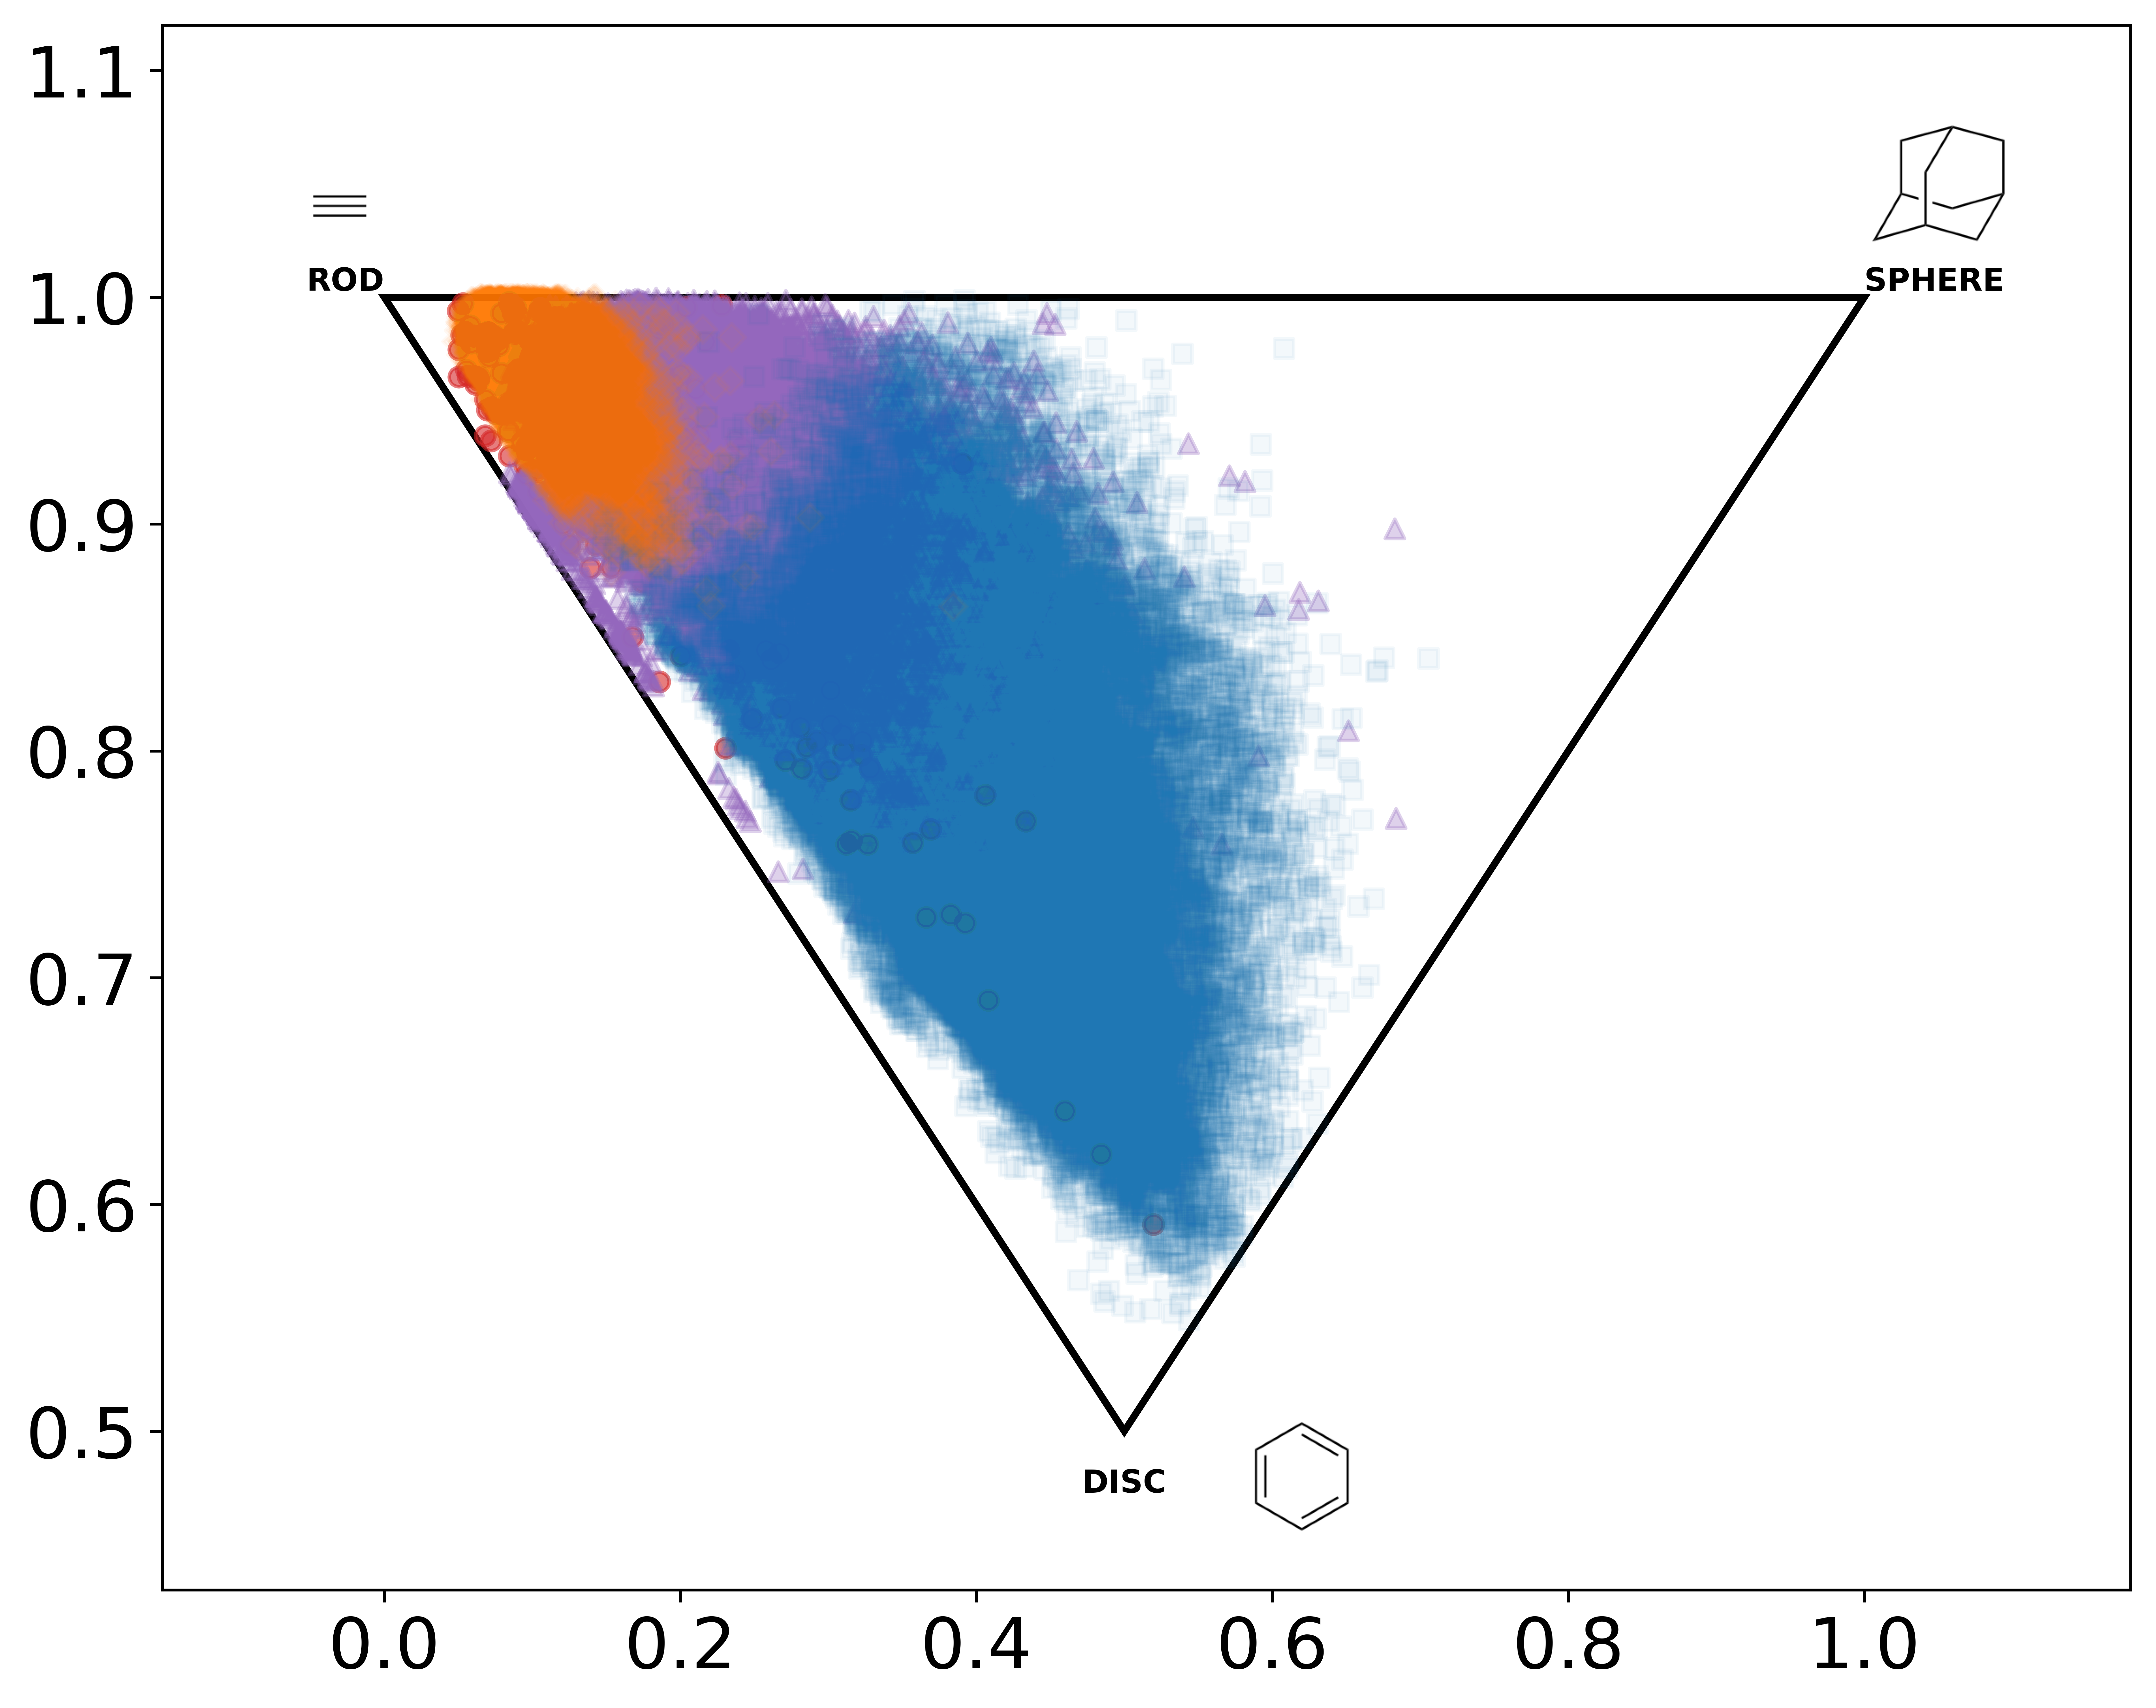

In [29]:
# Assuming df, bia, ind, pyr are your DataFrames, and contain 'npr1', 'npr2', and 'pIC50' columns
fig, ax = plt.subplots(figsize=(10, 8), dpi=800)

# Define triangle vertices
triangle_vertices = [(0, 1), (0.5, 0.5), (1, 1)]

# Plot the triangle boundary
triangle = plt.Polygon(triangle_vertices, fill=None, edgecolor='black', linewidth=2)
ax.add_patch(triangle)

# Modify the size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=20)  # Change to desired font size
ax.tick_params(axis='both', which='minor', labelsize=20)  # Optional for minor ticks

# Plot the data points from the DataFrames
ax.scatter(df['npr1'], df['npr2'], c="#d62728", s=30, alpha=0.6, marker='o')   #edgecolors='black',
ax.scatter(bia['npr1'], bia['npr2'], c="#9467bd", s=30, alpha=0.3, marker='^')
ax.scatter(ind['npr1'], ind['npr2'], c="#1f77b4", s=30, alpha=0.05, marker='s')
ax.scatter(pyr['npr1'], pyr['npr2'], c="#ff7f0e", s=30, alpha=0.05, marker='D')


# Adjust axis limits to provide space around the triangle without changing the vertices
ax.set_xlim(-0.15, 1.18)
ax.set_ylim(0.43, 1.12)

# Set axis labels
#ax.set_xlabel('I1 / I3', fontsize=14)
#ax.set_ylabel('I2 / I3', fontsize=14)

# Label the triangle vertices
ax.text(0, 1, 'ROD', fontsize=9, verticalalignment='bottom', horizontalalignment='right', color='black', weight='bold')
ax.text(0.5, 0.47, 'DISC', fontsize=9, verticalalignment='bottom', horizontalalignment='center', color='black', weight='bold')
ax.text(1, 1, 'SPHERE', fontsize=9, verticalalignment='bottom', horizontalalignment='left', color='black', weight='bold')

# Add the pre-made PNG images of molecular structures near the vertices using PIL to load the images
add_png_image(ax, 'your path/rod.png', (-0.03, 1.04), zoom=0.25)  # Adjust the path and zoom
add_png_image(ax, 'your path/disc.png', (0.62, 0.48), zoom=0.25)
add_png_image(ax, 'your path/sphere.png', (1.05, 1.05), zoom=0.25)

# Remove the grid for a cleaner look
ax.grid(False)

# Set the title for the plot
#ax.set_title("PMI", fontsize=16)

# Show the plot
plt.show()


In [11]:
# Save the figure with high resolution
plt.savefig('PMI_saureus_STADS.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


<Figure size 640x480 with 0 Axes>